In [56]:
from Hallway import Hallway
import numpy as np
from random import choice
import matplotlib.pyplot as plt
import math

In [57]:
hall = Hallway()

In [58]:
def neib(s, states):
    neibs = []
    
    for k in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
        n = (s[0]-k[0], s[1]-k[1])
        if n in states:
            neibs.append(n)
            
    return neibs

In [64]:
maxs = [-math.inf for _ in range(20000)]

for repetition in range(30):
    hall = Hallway()
    reward_model = {s: {st: 0.0 for st in list(hall._reward_means[s].keys()) } for s in hall._states}
    options_called_counter = 0
    while options_called_counter < 20000:
        for s in hall._states:
            o = choice(list(hall._reward_means[s].keys()))

            r, k = hall.execute(s, o)
            err = r - reward_model[s][o]
            reward_model[s][o] = reward_model[s][o] + (1./4.) * err
            
            if abs(err) > maxs[options_called_counter]:
                maxs[options_called_counter] = abs(err)
                
            options_called_counter += 1
            if options_called_counter >= 20000:
                break


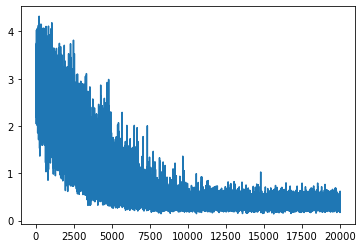

In [65]:
plt.plot(maxs, '-')

In [49]:
maxs

[0.19113717898568583,
 0.44496473920690116,
 0.41253877680757256,
 0.1931520730269754,
 2.659112401817396,
 0.48537771537174623,
 0.24969568006733084,
 1.4064233132507094,
 0.21692156403046417,
 0.8161371602056033,
 0.16245386778103632,
 0.49691582484413893,
 2.614438418551061,
 0.09091043924534041,
 2.500983158812833,
 0.03902751976519703,
 0.5914212053320922,
 1.0721311324312772,
 0.5569494406716265,
 0.09729914489001958,
 0.06375777381204552,
 0.7352075241962177,
 0.161272957757909,
 0.4356478733088749,
 0.7547337107141168,
 0.9022949169886539,
 0.5588230241886912,
 0.32525650770697523,
 0.28765141302749603,
 0.08806701865214919,
 0.7772919115266517,
 0.16595019262809602,
 1.0410946923423738,
 0.45011320409116795,
 0.3264794276423606,
 0.5997621808116397,
 1.6248171102495501,
 0.05648792260525537,
 0.40520311726346536,
 1.1288434524176587,
 0.6789383758487519,
 0.033214992596070275,
 2.5380608240870743,
 0.4174065790106526,
 0.5731206115410605,
 0.6011099975161698,
 2.28373041940539